# Linear regression

This exercise is described in [ex1.pdf](data/ml-ex1/ex1.pdf).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

%matplotlib inline

## Linear regression with one variable

In [2]:
# Load data from CSV file
# - column 1: population (x)
# - column 2: profit (y)
data = np.loadtxt('data/ml-ex1/ex1data1.txt', delimiter=',')

In [3]:
# Separate features (x) from target (y)
X, y = np.hsplit(data, 2)

In [4]:
# Number of samples
m = y.size

In [5]:
# Fit a linear regression model (without regularization)
model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [6]:
# Obtain coefficients theta0 and theta1 from model
theta0, theta1 = model.intercept_, model.coef_[0]
theta0, theta1

(array([-3.89578088]), array([ 1.19303364]))

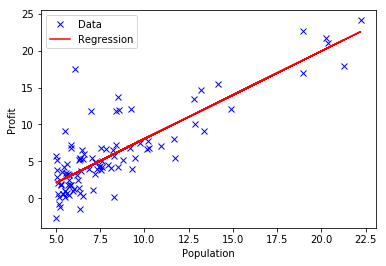

In [7]:
# Plot data and regression line
plt.plot(X, y, 'bx', label='Data')
plt.plot(X, model.predict(X), 'r-', label='Regression')
plt.xlabel('Population')
plt.ylabel('Profit')
plt.legend()
plt.show()

In [8]:
# Training mean squared error
np.mean((model.predict(X) - y) ** 2)

8.9539427519503576

In [9]:
# Training score
model.score(X, y)

0.70203155378413973

In [10]:
# Predict profit for populations of 35.000 and 70.000 
model.predict(np.array([[3.5], [7.0]])) * 10000

array([[  2798.36876352],
       [ 44554.54631015]])

See also [this Stackoverflow entry](https://stackoverflow.com/questions/34170618/normal-equation-and-numpy-least-squares-solve-methods-difference-in-regress) for the following calculations:

In [11]:
# LinearRegression above internally added a column vector of 1s.
# For the following calculations, this must be done explicitly.
X = np.c_[np.ones(m), X]

In [12]:
# Compute least-squares solution with np.linalg.lstsq. 
# This is what LinearRegression actually does under the hood.
Theta = np.linalg.lstsq(X, y)[0]
Theta

array([[-3.89578088],
       [ 1.19303364]])

In [13]:
# Solve analytically (without explicit inverse)
Theta = np.linalg.solve(X.T.dot(X), X.T.dot(y))
Theta

array([[-3.89578088],
       [ 1.19303364]])

In [14]:
# Solve normal equation (explicit inverse)
Theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
Theta

array([[-3.89578088],
       [ 1.19303364]])

In [15]:
# Solve normal equation (explicit pseudo-inverse)
Theta = np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(y)
Theta

array([[-3.89578088],
       [ 1.19303364]])

In [16]:
# Cost function (mean squared error)
def cost(X, y, Theta):
    diff = X.dot(Theta) - y
    return np.sum(diff * diff, axis=0) / y.size

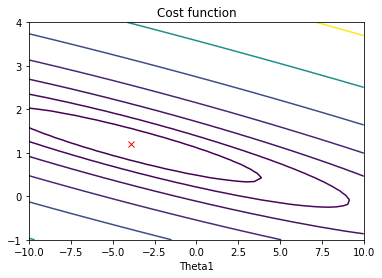

In [17]:
# Create a 50*50 grid for Theta0 and Theta1 ranges
Theta_grid = np.mgrid[-10:10:50j, -1:4:50j]

# Theta values in an array of shape (2500,2)
Thetas = np.c_[Theta_grid[0].ravel(), Theta_grid[1].ravel()]

# Compute costs on grid points
costs = cost(X, y, Thetas.T)

# Cost values reshaped to grid
cost_grid = costs.reshape(Theta_grid[0].shape)

# Contour plot of cost function
plt.contour(Theta_grid[0], Theta_grid[1], cost_grid, levels=[20, 40, 80, 160, 320, 640, 1280])

# Plot optmimum
plt.plot(Theta[0], Theta[1], 'rx')

# Title and axis labels
plt.xlabel('Theta0')
plt.xlabel('Theta1')
plt.title('Cost function')
plt.show()

## Linear regression with multiple variables

In [18]:
# Load data from CSV file
# - column 1: house size in feet**2 (x1)
# - column 2: number of bedrooms (x2)
# - column 3: house price (y)
data = np.loadtxt('data/ml-ex1/ex1data2.txt', delimiter=',')

In [19]:
# Separate features (x1, x2) from target (y)
X, y = np.hsplit(data, np.array([2]))

In [20]:
# Number of samples
m = y.size

In [21]:
# Pipeline components
scaler = StandardScaler()
regr = LinearRegression()

# Pipeline of feature scaler and linear regressor
model = Pipeline([('scaler', scaler), ('regr', regr)])

In [22]:
# Run linear regression on scaled features
model.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('regr', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [23]:
# Create a grid from feature min and max values
grid_range = np.vstack([X.min(axis=0), X.max(axis=0)])
grid = np.meshgrid(grid_range[:,0], grid_range[:,1])

# Compute predictions from grid values
X_grid = np.c_[grid[0].ravel(), grid[1].ravel()]
y_grid = model.predict(X_grid).reshape(grid[0].shape)

def plot_data_and_regression(fig, fignum, view_angle):
    sp = fig.add_subplot(2, 1, fignum, projection='3d')
    sp.view_init(view_angle, 90)
    sp.set_xlabel('Square feet')
    sp.set_ylabel('Bedrooms')
    sp.set_zlabel('Price')
    sp.set_title(f'angle = {view_angle}')
    # Customize tick locators
    sp.yaxis.set_major_locator(ticker.MultipleLocator(1.00))
    sp.zaxis.set_major_locator(ticker.MultipleLocator(200000))
    # Plot samples
    sp.scatter(X[:,0], X[:,1], y)
    # Plot regression area
    sp.plot_surface(grid[0], grid[1], y_grid, color='y', alpha=0.2)

# Create new figure
fig = plt.figure(2, figsize=[9, 10])
 
# Plot data and regression from two different angles
plot_data_and_regression(fig, fignum=1, view_angle=20)
plot_data_and_regression(fig, fignum=2, view_angle=75)

SyntaxError: invalid syntax (<ipython-input-23-0b3dd502a012>, line 15)

In [24]:
# Training mean squared error
np.mean((model.predict(X) - y) ** 2)

4086560101.205658

In [25]:
# Training score
model.score(X, y)

0.7329450180289141

See also [this Stackoverflow entry](https://stackoverflow.com/questions/34170618/normal-equation-and-numpy-least-squares-solve-methods-difference-in-regress) for the following calculations:

In [26]:
# Add a column of 1s
X = np.c_[np.ones(m), X]

In [27]:
# Solve analytically (without explicit inverse)
Theta = np.linalg.solve(X.T.dot(X), X.T.dot(y))
Theta

array([[ 89597.9095428 ],
       [   139.21067402],
       [ -8738.01911233]])

In [28]:
# Solve normal equation (explicit pseudo-inverse)
Theta = np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(y)
Theta

array([[ 89597.90954361],
       [   139.21067402],
       [ -8738.01911255]])

In [29]:
# Compute cost of solution
cost(X, y, Theta)

array([  4.08656010e+09])